# Time Series Prototyping for Intrusion Detection 

In [1]:
# use print only as a function
from __future__ import print_function
import sys
sys.version_info

sys.version_info(major=3, minor=5, micro=1, releaselevel='final', serial=0)

## Connect to data and read into dataframe

In [2]:
__author__ = 'swe03'

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from decimal import *

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from scipy import stats

import statsmodels.api as sm
import statsmodels.tsa as tsa

from statsmodels.graphics.api import qqplot
from statsmodels.tsa.base import datetools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime

desired_width = 250
pd.set_option('display.width',desired_width)

In [10]:
# Read in the csv file stored in Data folder in Network Security 
# Note the use of both the parse_dates and data_parser functions to convert the string into a datetime64 dtype
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')
calc_ent1 = pd.read_csv("H:\\Network Security/Data/ExtraHop/calc_ent1.csv",parse_dates=['date_time'],date_parser=dateparse )
calc_ent1.head(5)
#print('\n Data Type')
calc_ent1.dtypes    # "Object" dtype display means a String. Which was the type before the date parsing above in the read
#type(data_sample)
#dir(calc_ent2)


#df = pd.read_csv(infile, parse_dates={'datetime': ['date', 'time']}, date_parser=dateparse)


index                 int64
date_time    datetime64[ns]
ent1                float64
dtype: object

In [11]:
## Never used this but still curious about it.
# reader = csv.DictReader(fil, delimiter=';')         #read the csv file
#    for row in reader:
#        date = datetime.strptime(row['Dispatch date'], '%Y-%m-%d %H:%M:%S') 

###### Install the SQL package if not already installed 

In [12]:
#!pip install pandasql  

In [13]:
# Convert the ts variable to a number of date-time values for Time Series index
# Use the functions usec_to_timestamp

from pandasql import PandaSQL 
pdsql = PandaSQL()
#type(pdsql)
#local = locals()

today = datetime.date.today()
print today
print 'ctime:', today.ctime()
print 'tuple:', today.timetuple()
print 'ordinal:', today.toordinal()
print 'Year:', today.year
print 'Mon :', today.month
print 'Day :', today.day

In [14]:
calc_ent1['ln_ent1'] = np.log(calc_ent1['ent1'])
calc_ent1
#len(calc_ent1)  #2375  Correct

,index,date_time,ent1,ln_ent1
0,0,2016-09-05 00:00:00,0.035714,-3.332205
1,1,2016-09-05 00:00:00,0.071429,-2.639057
2,2,2016-09-05 00:00:00,0.035714,-3.332205
3,3,2016-09-05 00:00:00,0.035714,-3.332205
4,4,2016-09-05 00:00:00,0.035714,-3.332205
5,5,2016-09-05 00:00:00,0.071429,-2.639057
6,6,2016-09-05 00:00:00,0.071429,-2.639057
7,7,2016-09-05 00:00:00,0.035714,-3.332205
8,8,2016-09-05 00:00:00,0.035714,-3.332205
9,9,2016-09-05 00:00:00,0.035714,-3.332205


In [15]:
# The first value has been audited and validated
calc_ent2 = pdsql("""SELECT i.date_time, sum(i.ent1 * i.ln_ent1) as hx_ent,  count(i.date_time) as hour_event_cnt
                  from calc_ent1 i
                  group by i.date_time
                  order by i.date_time""",locals())

In [16]:
calc_ent2  ## 120 records (i.e., 24*5)

,date_time,hx_ent,hour_event_cnt
0,2016-09-05 00:00:00.000000,-2.936120,20
1,2016-09-05 01:00:00.000000,-2.364944,16
2,2016-09-05 02:00:00.000000,-2.278760,11
3,2016-09-05 03:00:00.000000,-3.313175,20
4,2016-09-05 04:00:00.000000,-3.348070,20
5,2016-09-05 05:00:00.000000,-3.762092,20
6,2016-09-05 06:00:00.000000,-3.526302,20
7,2016-09-05 07:00:00.000000,-3.121989,20
8,2016-09-05 08:00:00.000000,-3.596566,20
9,2016-09-05 09:00:00.000000,-5.770805,20


In [17]:

calc_ent2['entropy'] = -(calc_ent2['hx_ent'] / np.log(calc_ent2['hour_event_cnt']))
calc_ent2

,date_time,hx_ent,hour_event_cnt,entropy
0,2016-09-05 00:00:00.000000,-2.936120,20,0.980101
1,2016-09-05 01:00:00.000000,-2.364944,16,0.852973
2,2016-09-05 02:00:00.000000,-2.278760,11,0.950317
3,2016-09-05 03:00:00.000000,-3.313175,20,1.105965
4,2016-09-05 04:00:00.000000,-3.348070,20,1.117613
5,2016-09-05 05:00:00.000000,-3.762092,20,1.255817
6,2016-09-05 06:00:00.000000,-3.526302,20,1.177108
7,2016-09-05 07:00:00.000000,-3.121989,20,1.042146
8,2016-09-05 08:00:00.000000,-3.596566,20,1.200563
9,2016-09-05 09:00:00.000000,-5.770805,20,1.926342


In [33]:
calc_ent2.to_csv("H:\\Network Security/Data/ExtraHop/calc_ent2.csv", encoding='utf-8', columns=calc_ent2.columns.values.tolist()) 

In [18]:
#dir(calc_ent2['entropy'])

In [24]:
# Set the index for subsequent processing
#calc_ent2 = calc_ent2.set_index(pd.DatetimeIndex(calc_ent2['date_time'])
#calc_ent2

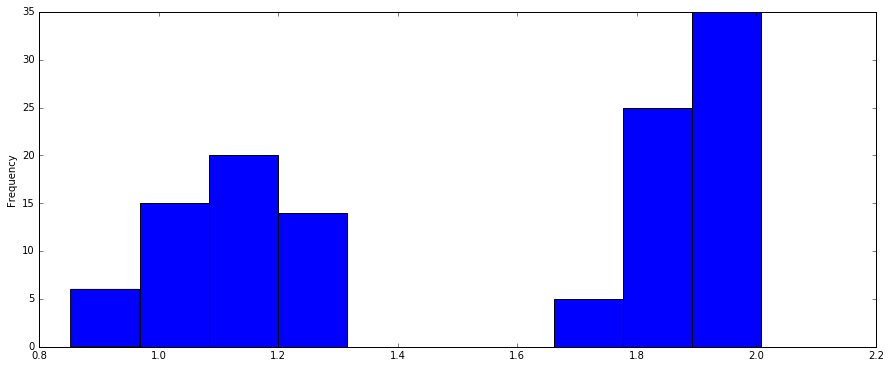

In [19]:
## Frequency of attributes_bytes ranges (can't yet figure out how to make bins rather than accepting default)
#dir(port_df.plot.hist)
#my_plot = port_df_totals['attributes_bytes'].plot.hist()
#my_plot = port_df_mean['attributes_bytes'].plot.hist()
my_plot = calc_ent2['entropy'].plot.hist()


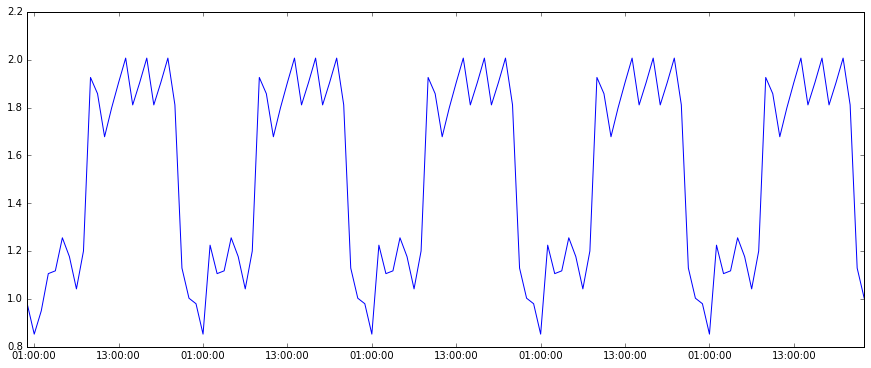

In [25]:
import matplotlib.pyplot as pplt
#my_plot=pplt.plot(port_df_mean['attributes_bytes'])
my_plot=pplt.plot(calc_ent2['entropy'])
pplt.autoscale(enable=True, axis='x', tight=None)
pplt.show()

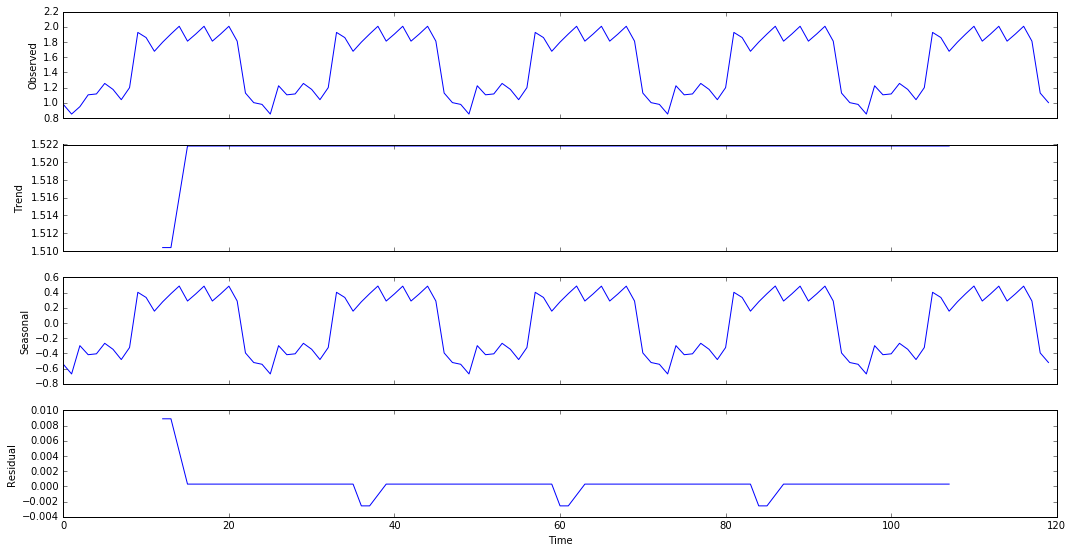

In [26]:
decomposition = seasonal_decompose(calc_ent2.entropy.values, freq=24)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [44]:
model=ARIMA(calc_ent2['entropy'],(1,0,0))    ## The endogenous variable needs to be type Float or you get a cast error
model_fit = model.fit()       # fit is a Function
model_fitted = model_fit.fittedvalues    # fittedvalues is a Series
print(model_fit.summary())
print(model_fitted)

                              ARMA Model Results                              
Dep. Variable:                entropy   No. Observations:                  120
Model:                     ARMA(1, 0)   Log Likelihood                   2.701
Method:                       css-mle   S.D. of innovations              0.235
Date:                Thu, 06 Oct 2016   AIC                              0.599
Time:                        18:09:48   BIC                              8.961
Sample:                    09-05-2016   HQIC                             3.995
                         - 09-09-2016                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             1.4827      0.115     12.919      0.000         1.258     1.708
ar.L1.entropy     0.8183      0.053     15.533      0.000         0.715     0.922
                                    Root

In [29]:
from pprint import pprint               # get a variety of different attributes from the object (including functions)
#pprint (dir(model))
#pprint (dir(model_fit))

In [30]:
print(model.endog_names)
print(model.exog_names)
print(model.information)
print(model.predict)

entropy
['const', 'ar.L1.entropy']
<bound method LikelihoodModel.information of <statsmodels.tsa.arima_model.ARMA object at 0x000000000BF35048>>
<bound method ARMA.predict of <statsmodels.tsa.arima_model.ARMA object at 0x000000000BF35048>>


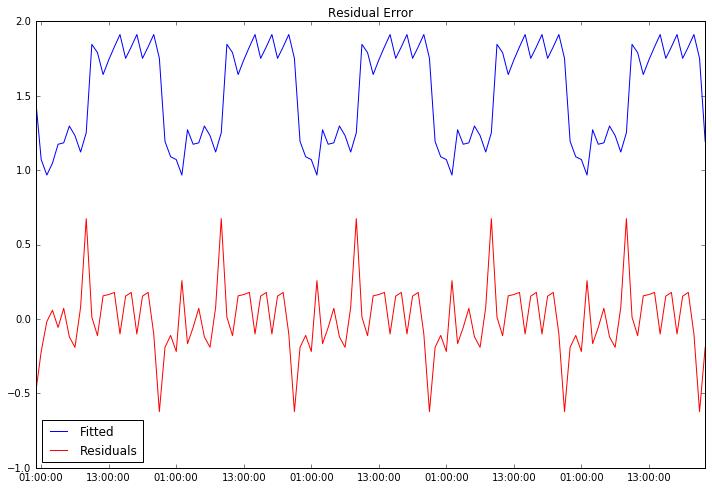

In [34]:
#print(model_fit.resid)
#print(model_fit.fittedvalues)

#Plot rolling statistics:
fig = plt.figure(figsize=(12, 8))
orig = plt.plot(model_fit.fittedvalues, color='blue',label='Fitted')
resid = plt.plot(model_fit.resid, color='red', label='Residuals')
   
plt.legend(loc='best')
plt.title('Residual Error')
plt.show()

2016-09-10 00:00:00    1.090330
2016-09-10 01:00:00    1.161615
2016-09-10 02:00:00    1.219947
2016-09-10 03:00:00    1.267682
2016-09-10 04:00:00    1.306744
2016-09-10 05:00:00    1.338710
2016-09-10 06:00:00    1.364867
2016-09-10 07:00:00    1.386272
2016-09-10 08:00:00    1.403788
2016-09-10 09:00:00    1.418122
2016-09-10 10:00:00    1.429852
2016-09-10 11:00:00    1.439450
2016-09-10 12:00:00    1.447305
2016-09-10 13:00:00    1.453732
2016-09-10 14:00:00    1.458992
2016-09-10 15:00:00    1.463296
2016-09-10 16:00:00    1.466818
2016-09-10 17:00:00    1.469701
2016-09-10 18:00:00    1.472059
2016-09-10 19:00:00    1.473989
2016-09-10 20:00:00    1.475569
2016-09-10 21:00:00    1.476861
2016-09-10 22:00:00    1.477919
2016-09-10 23:00:00    1.478784
Freq: H, dtype: float64


C:\Users\swe03\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


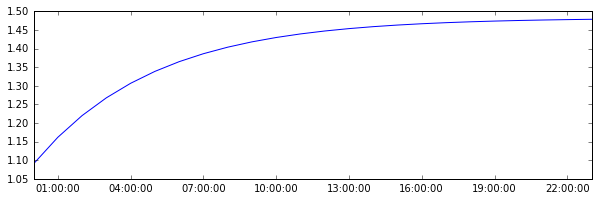

In [57]:
## One of the developers of the method states "Note that ARMA will fairly quickly converge to the long-run mean, 
## provided that your series is well-behaved, so don't expect to get too much out of these very long-run prediction exercises.
## http://stats.stackexchange.com/questions/76160/im-not-sure-that-statsmodels-is-predicting-out-of-sample
predict = model_fit.predict(start='2016-09-10 00:00:00' , end='2016-09-10 23:00:00' ,dynamic=True)
#forecast = model_fit.forecast(steps=10, exog=None, alpha=0.05)  ## Never got this to work
print(predict)
#dir(model_fit)

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
ax.plot(predict)
#ax.plot(forecast)

#ax.plot(calc_ent2.index, calc_ent2['entropy'])
##ax.plot(calc_ent2.index, calc_ent2['entropy']-calc_ent2['entropy'].mean())
#ax.plot(predict.index, predict, 'r-')